# Reward statistics

# Overview:

------

## Uniformly generated data for reward sampling:
- Grid:
	- distance between neighbouring points 1600
	- z 2, x 6, y 7
	- total points 84
- Player linear velocities:
	- max 1327.9, min 0
	- 8 points
- Ball linear velocities
	- max 3464.1, min 0
	- 8 points
- Forward vectors
	- 50 sphere points

------

## Rewards:
- Align ball:
	- one positive peak near team goal
	- one negative peak near opponent goal
- Ball to goal wall distance:
	- uniform
- Face ball:
	- expected value 0
	- forward face: 
		- nearly uniform
		- wide positive peak near team goal
		- wide negative peak near opponent goal
	- left face:
		- nearly uniform 
		- wide positive peak near left wall
		- wide negative peak near right wall
- Distance ball to goal:
	- circular extending from opponent goal, always positive
	- custom signed:
        - a solution to all positives
		- larger dispersion - 0 values starting point move further from opponent goal
		- larger density - larger positive and smaller negative values, sigma shaped
- Distance player to ball:
	- players in the mid naturally have a smaller average distance toward any point of the arena
	- custom: 
		- larger dispersion - larger expected values
		- larger density - larger expected values
- Save boost:
	- concave function
    - rewards smaller value differences more
- Touch ball with aerial height (custom):
	- linear for exponent 1
	- convex for exponent > 1 and larger values
	- concave for exponent < 1 and smaller values
- Velocity:
	- simple player linear velocity norm
	- linear
- Velocity ball to goal:
	- expected value 0
	- large rewards for ball velocities toward goal
- Velocity player to ball:
	- expected value 0
	- forward face: 
		- nearly uniform
		- wide positive peak near team goal
		- wide negative peak near opponent goal
	- left face:
		- nearly uniform 
		- wide positive peak near left wall
		- wide negative peak near right wall


We import utils and libraries

In [1]:
import sys
from pathlib import Path

# Modify this as you wish, used for importing custom project packages, such as `utils`
project_path = str(Path.home()) + "\\Projects\\rlgym_demo"

sys.path.insert(0, project_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rlgym_analysis import plotting
from rlgym_analysis.utils import generate
from rlgym_analysis.reward_functions import common_rewards, custom_rewards
from rlgym.utils import common_values
import pandas as pd
import seaborn as sns

Retrieve arena positions

In [3]:
arena_positions = plotting.arena_positions

## Dummy values generation

We use uniformly generated dummy values for ball positions, linear velocities and player forward vectors.

Those dummy values can be replaced in the future by values detected from replay data of various ranks.

### Grid-like arena positions

In [4]:
grid_positions = generate.grid_positions()

Positions that go beyond the arena corners are clipped

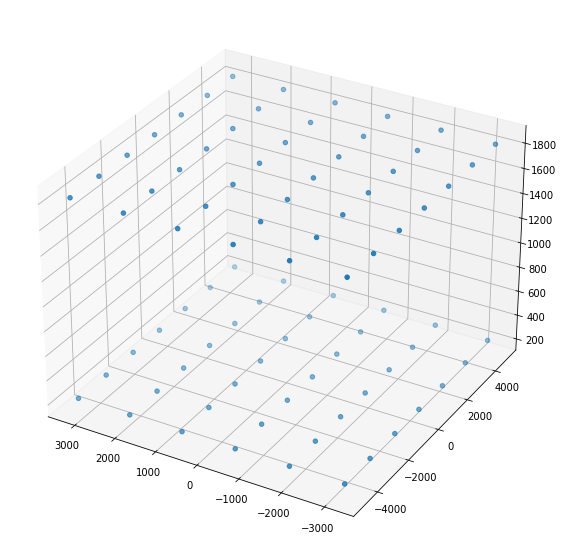

In [5]:
plt.figure(figsize=(10, 10))\
    .add_subplot(111, projection="3d")\
    .scatter(grid_positions[:, 0], grid_positions[:, 1], grid_positions[:, 2])
plt.gca().invert_xaxis()
plt.show()

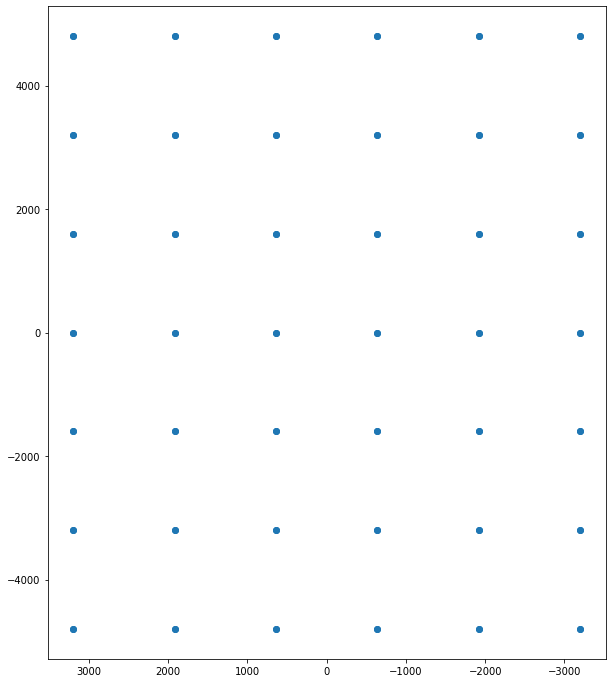

In [6]:
plt.figure(figsize=(10, 12))
plt.scatter(grid_positions[:, 0], grid_positions[:, 1])
plt.gca().invert_xaxis()
plt.show()

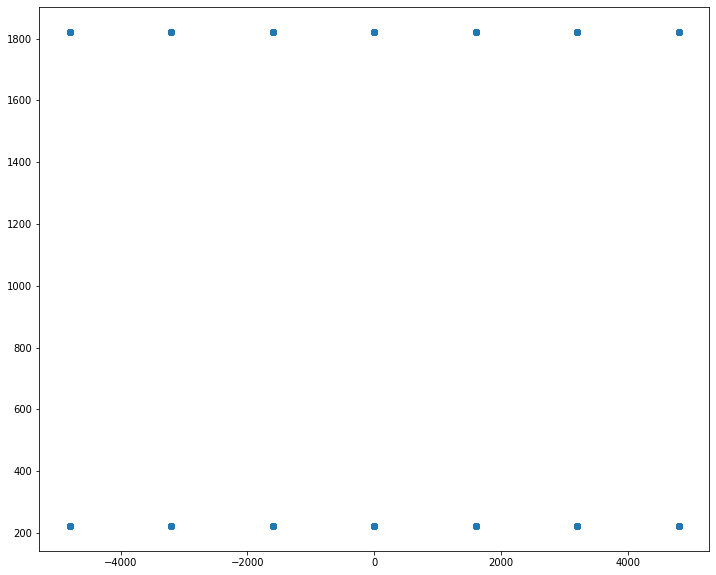

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(grid_positions[:, 1], grid_positions[:, 2])
plt.show()

### Player linear velocities

All-point velocities of 1327.9 produce an L2 norm (velocity vector length \ speed) of 2300. 

2300 is the max player velocity.

In [8]:
player_velocities = np.linspace((1327.9,) * 3, (0,) * 3, 8)

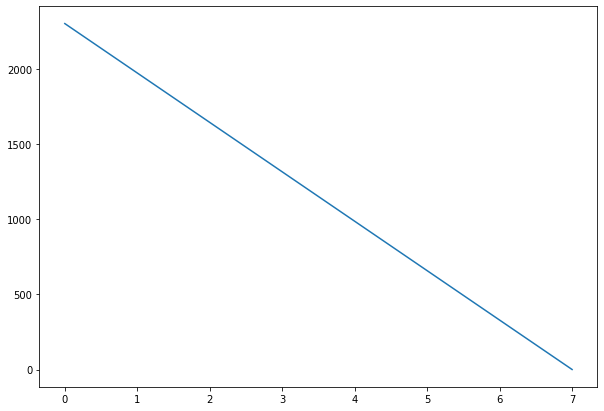

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(np.linalg.norm(player_velocities, axis=1))
plt.show()

Generated player velocities decrease and increase linearly.

The mean is close to the true velocity mean 2300 / 2 = 1150.

In [10]:
np.linalg.norm(player_velocities, axis=1).mean()

1149.995133685356

## Ball linear velocities

In [11]:
ball_velocities = np.linspace((3464.1,) * 3, (0,) * 3, 8)

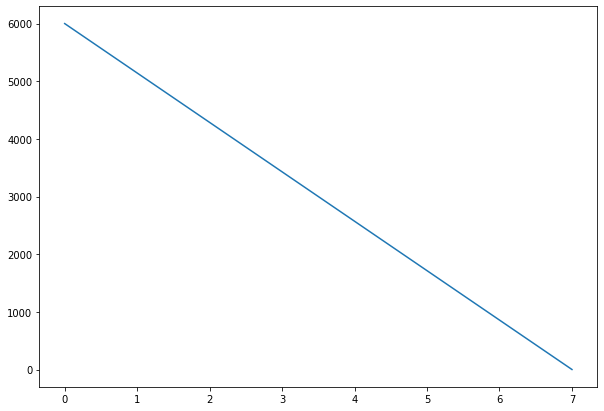

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(np.linalg.norm(ball_velocities, axis=1))
plt.show()

Generated ball velocities decrease and increase linearly.

The mean is close to the true velocity mean 6000 / 2 = 3000.

In [13]:
np.linalg.norm(ball_velocities, axis=1).mean()

2999.998601249674

### Forward vectors

Forward vectors can be thought of as 3-d point representations of a sphere with radius 1.

Forward vectors can be used as player orientation and player and ball linear velocity coordinates.

In [14]:
forward_vectors = generate.sphere_points()

In [15]:
forward_vectors.round(3)

array([[ 0.072, -0.185,  0.98 ],
       [-0.306,  0.151,  0.94 ],
       [ 0.419,  0.122,  0.9  ],
       [-0.265, -0.436,  0.86 ],
       [-0.111,  0.561,  0.82 ],
       [ 0.504, -0.37 ,  0.78 ],
       [-0.669, -0.073,  0.74 ],
       [ 0.471,  0.536,  0.7  ],
       [ 0.016, -0.751,  0.66 ],
       [-0.542,  0.567,  0.62 ],
       [ 0.813, -0.054,  0.58 ],
       [-0.657, -0.526,  0.54 ],
       [ 0.133,  0.856,  0.5  ],
       [ 0.492, -0.739,  0.46 ],
       [-0.881,  0.217,  0.42 ],
       [ 0.812,  0.443,  0.38 ],
       [-0.304, -0.89 ,  0.34 ],
       [-0.382,  0.874,  0.3  ],
       [ 0.883, -0.391,  0.26 ],
       [-0.925, -0.311,  0.22 ],
       [ 0.476,  0.861,  0.18 ],
       [ 0.233, -0.962,  0.14 ],
       [-0.826,  0.555,  0.1  ],
       [ 0.987,  0.149,  0.06 ],
       [-0.628, -0.778,  0.02 ],
       [-0.062,  0.998, -0.02 ],
       [ 0.719, -0.693, -0.06 ],
       [-0.995,  0.025, -0.1  ],
       [ 0.747,  0.65 , -0.14 ],
       [-0.111, -0.977, -0.18 ],
       [-0

Vector norms should be equal to 1

In [16]:
np.linalg.norm(forward_vectors, axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

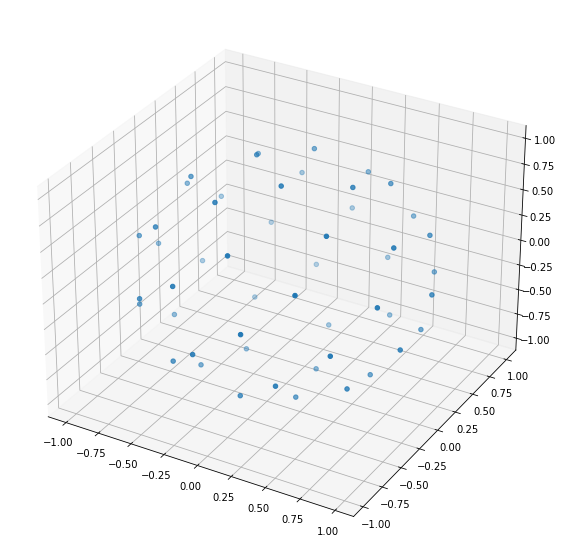

In [17]:
plt.figure(figsize=(10, 10))\
    .add_subplot(111, projection="3d")\
    .scatter(forward_vectors[:, 0], forward_vectors[:, 1], forward_vectors[:, 2])
plt.show()

## Common

We skip conditionals, constants and events, since those cannot be visualized in the arena and do not directly help shape rewards.

### Align ball

#### Plot

In [18]:
align_ball_zs = np.array([common_rewards.align_ball(arena_positions, ball_position, 0.5, 0.5)
                          for ball_position in grid_positions]).mean(0)

Positions near the player's team goal are generally rewarded more since player to goal and ball to goal vectors align easier, making them, theoretically, more suitable for both offense and defense.

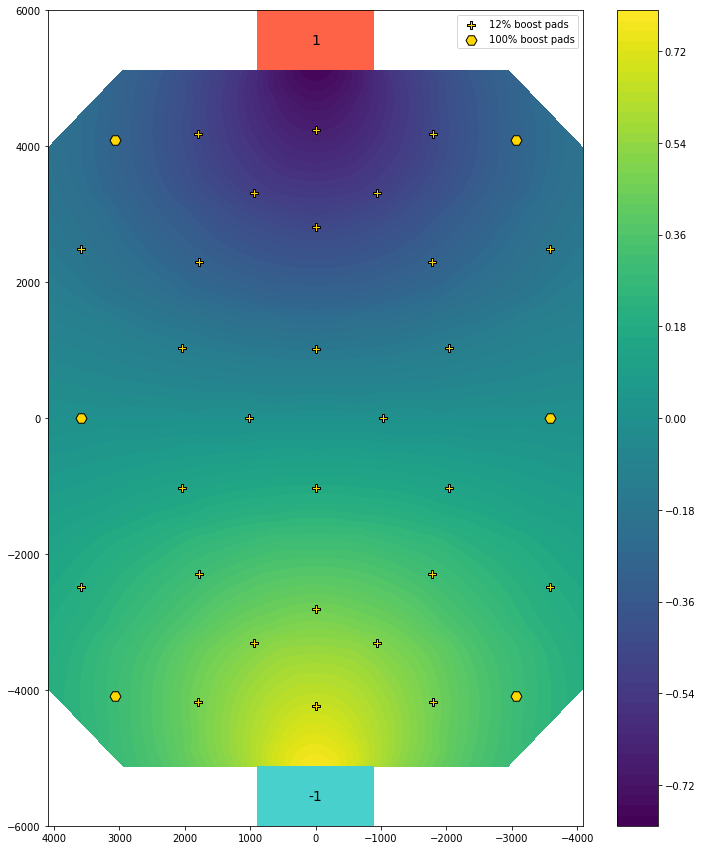

In [19]:
plotting.arena_contour(align_ball_zs)

#### Statistics

For statistics, we use the generated `grid_positions` due to the fact that the arena, due to triangularization of its shape, contains more points near the goals.

Point containing reward values near 0.3 and -0.3 are more frequent due to the shape of the reward

In [20]:
align_ball_vals = np.array([common_rewards.align_ball(grid_positions, ball_position, 0.5, 0.5)
                            for ball_position in grid_positions]).mean(0)

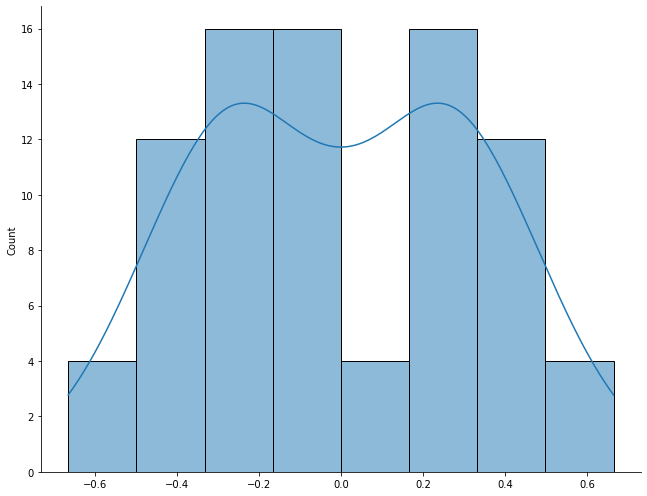

In [21]:
sns.displot(align_ball_vals, kde=True, height=7, aspect=1.3);

In [22]:
pd.Series(align_ball_vals).describe().round(3)

count    84.000
mean      0.000
std       0.329
min      -0.665
25%      -0.254
50%      -0.000
75%       0.254
max       0.665
dtype: float64

### Ball to goal wall distance

#### Plot

In [23]:
ball_y_coord_zs = common_rewards.ball_y_coord(arena_positions)

Having the ball near the opponent's goal wall is, naturally, better.

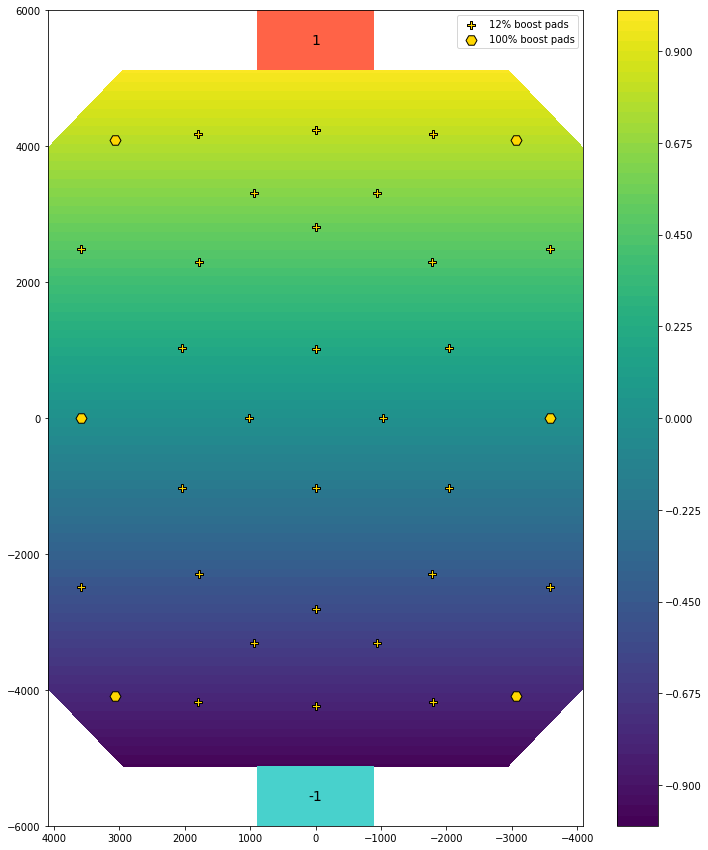

In [24]:
plotting.arena_contour(ball_y_coord_zs)

#### Statistics

In [25]:
ball_y_vals = common_rewards.ball_y_coord(grid_positions)

Ball to goal wall distance is uniformly distributed

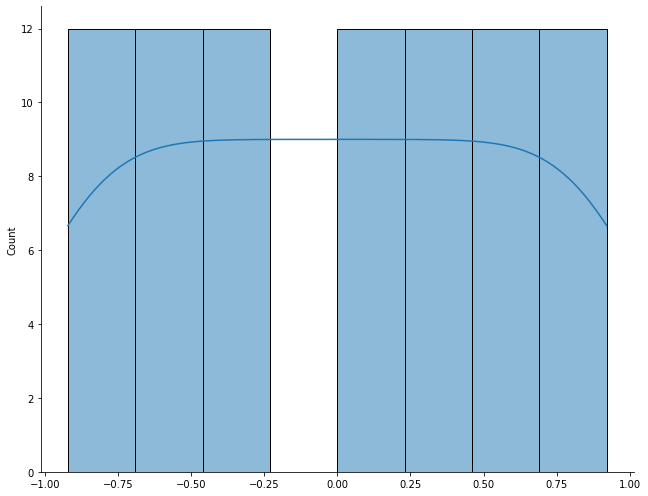

In [26]:
sns.displot(ball_y_vals, kde=True, height=7, aspect=1.3);

In [27]:
pd.Series(ball_y_vals).describe().round(3)

count    84.000
mean      0.000
std       0.618
min      -0.921
25%      -0.614
50%       0.000
75%       0.614
max       0.921
dtype: float64

### Face ball

#### Plot

In [28]:
face_ball_zs = np.array([common_rewards.face_ball(arena_positions, ball_position, forward_vec)
                         for ball_position in grid_positions
                         for forward_vec in forward_vectors]).mean(0)

The expected reward for facing the ball, given uniformly distributed forward vectors, is zero.

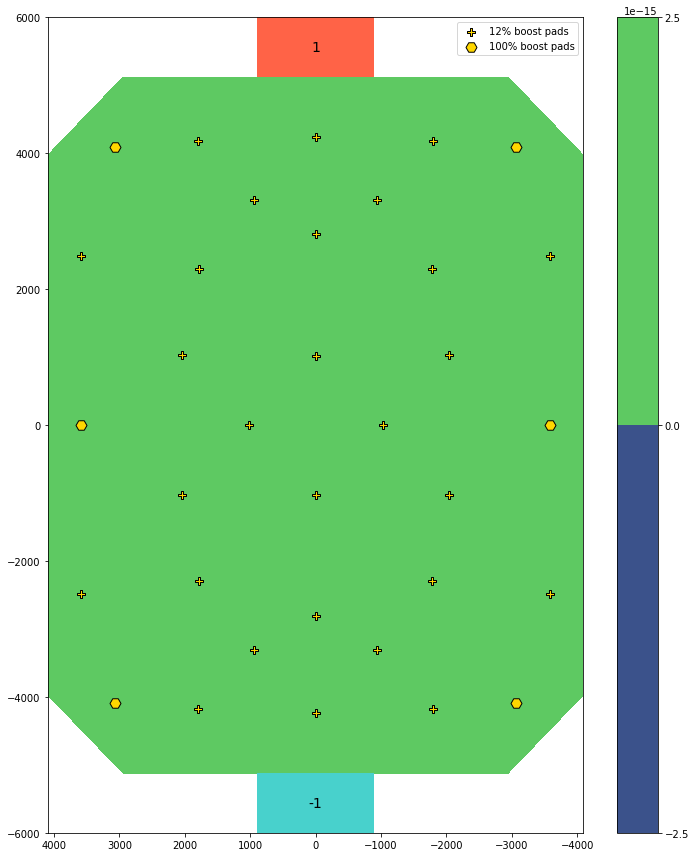

In [29]:
plotting.arena_contour(face_ball_zs.round(3))

#### Statistics

We first take a look at the face ball reward distribution when the player is facing forward

In [30]:
face_ball_forward_zs = np.array([common_rewards.face_ball(arena_positions,
                                                          ball_position,
                                                          np.array([0, 1, 0]))
                                 for ball_position in grid_positions]).mean(0)

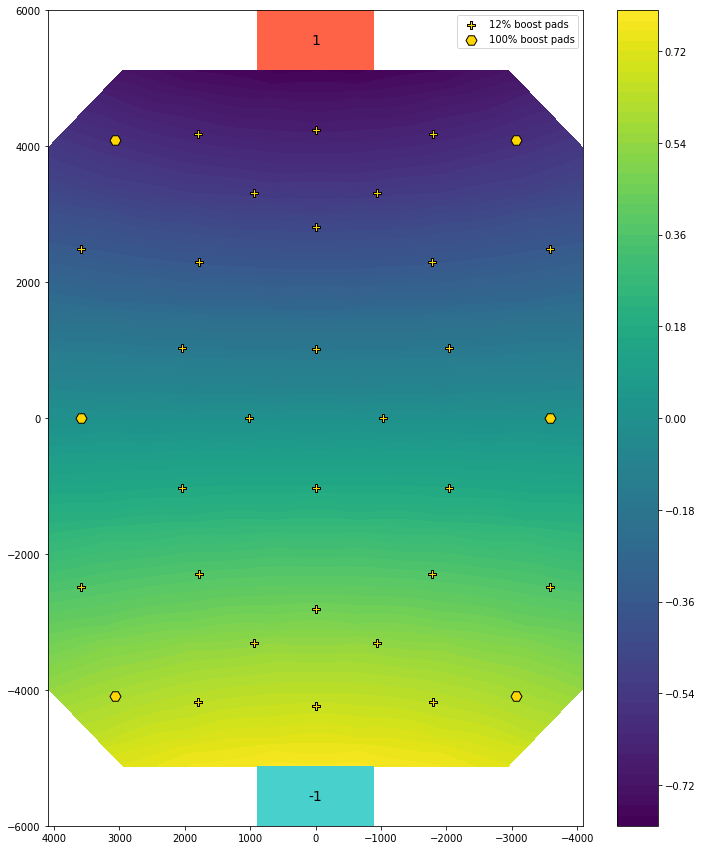

In [31]:
plotting.arena_contour(face_ball_forward_zs.round(3))

In [32]:
face_ball_forward_vals = np.array([common_rewards.face_ball(grid_positions,
                                                            ball_position,
                                                            np.array([0, 1, 0]))
                                   for ball_position in grid_positions]).mean(0)

The face forward ball reward distribution is uniform.

A similar case would be for a player facing backward.

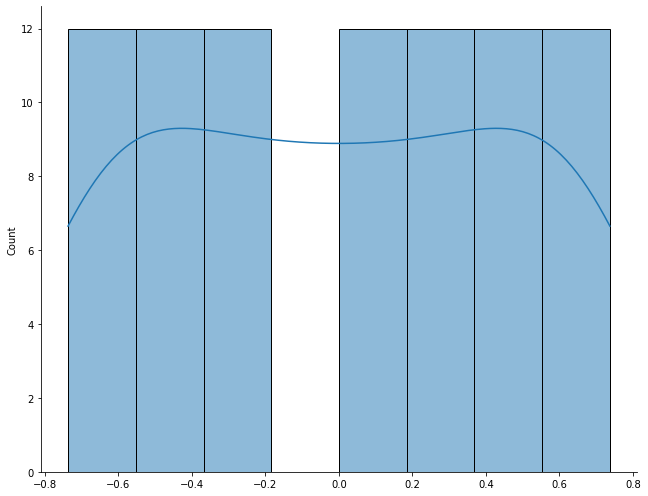

In [33]:
sns.displot(face_ball_forward_vals, kde=True, height=7, aspect=1.3);

In [34]:
pd.Series(face_ball_forward_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.483
min      -0.737
25%      -0.467
50%       0.000
75%       0.467
max       0.737
dtype: float64

We examine another case, for which the player is facing sideways.

In [35]:
face_ball_left_zs = np.array([common_rewards.face_ball(arena_positions,
                                                       ball_position,
                                                       np.array([1, 0, 0]))
                              for ball_position in grid_positions]).mean(0)

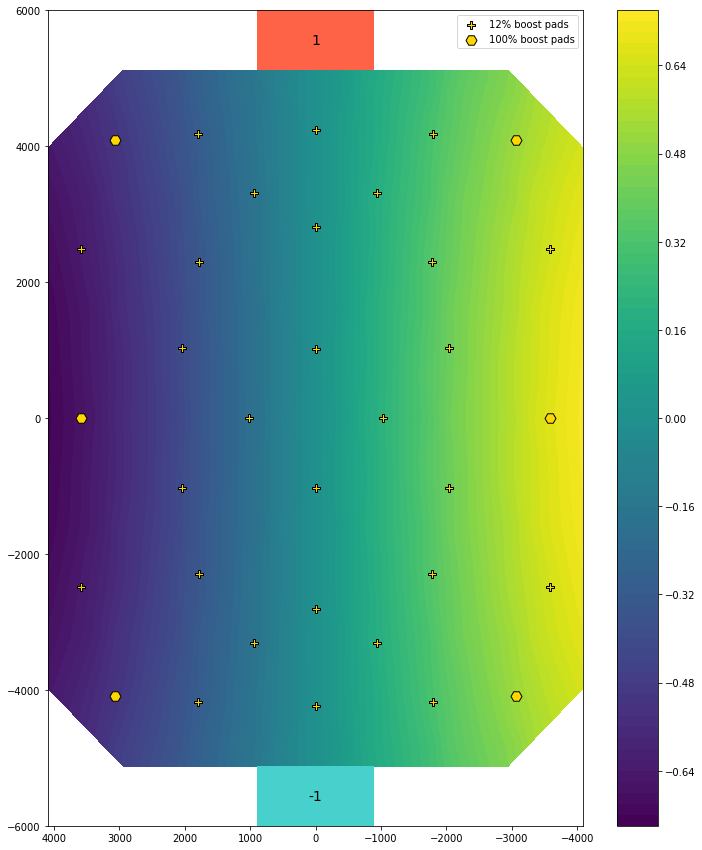

In [36]:
plotting.arena_contour(face_ball_left_zs.round(3))

In [37]:
face_ball_left_vals = np.array([common_rewards.face_ball(grid_positions,
                                                         ball_position,
                                                         np.array([1, 0, 0]))
                                for ball_position in grid_positions]).mean(0)

The face left ball reward distribution is also uniform.

A similar case would be for a player facing right.

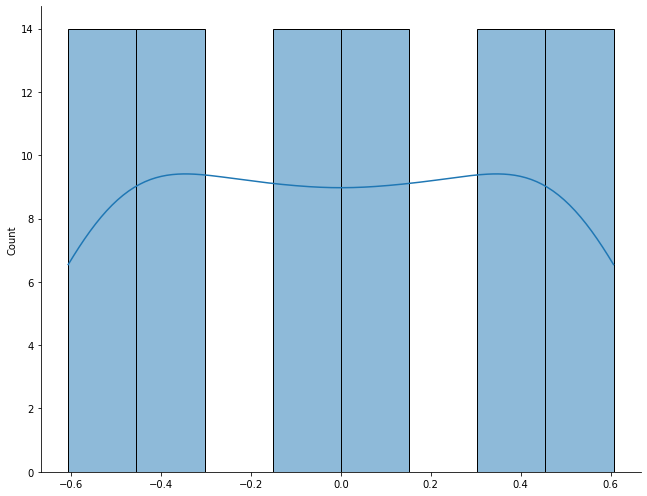

In [38]:
sns.displot(face_ball_left_vals, kde=True, height=7, aspect=1.3);

In [39]:
pd.Series(face_ball_left_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.393
min      -0.606
25%      -0.354
50%       0.000
75%       0.354
max       0.606
dtype: float64

### Distance ball to goal

#### Plot

In [40]:
liu_dist_ball2goal_zs = common_rewards.liu_dist_ball2goal(arena_positions)

Having the ball near the opponent's goal is better.

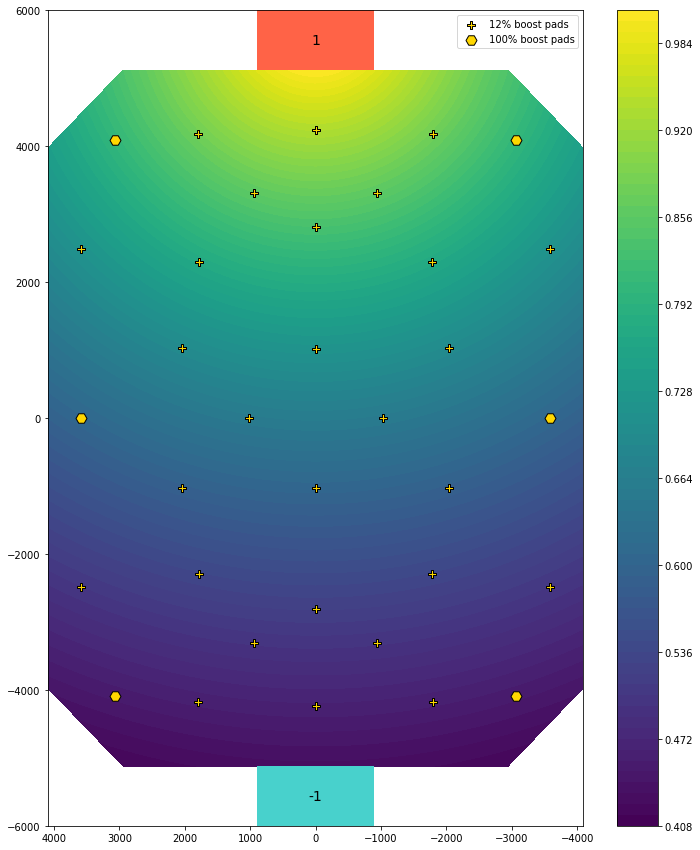

In [41]:
plotting.arena_contour(liu_dist_ball2goal_zs)

#### Statistics

In [42]:
liu_dist_ball2goal_vals = common_rewards.liu_dist_ball2goal(grid_positions)

There are fewer points with large rewards. The reward fades as the distance from the goal increases.

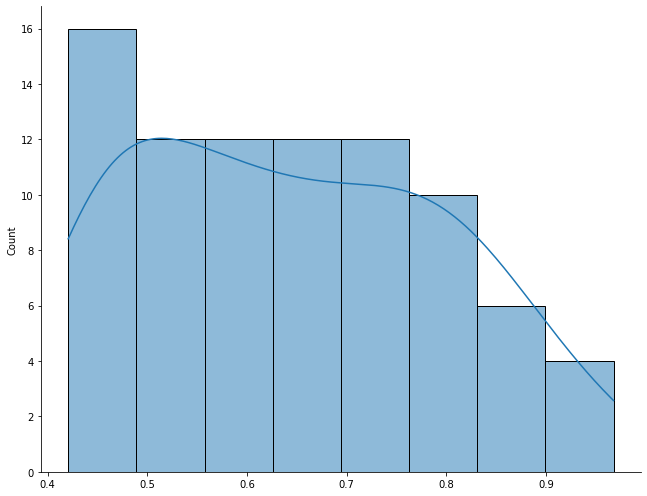

In [43]:
sns.displot(liu_dist_ball2goal_vals, kde=True, height=7, aspect=1.3);

In [44]:
pd.Series(liu_dist_ball2goal_vals).describe().round(3)

count    84.000
mean      0.643
std       0.155
min       0.421
25%       0.498
50%       0.637
75%       0.761
max       0.968
dtype: float64

### Distance player to ball

#### Plot

In [45]:
liu_dist_player2ball_zs = np.array([common_rewards.liu_dist_player2ball(arena_positions, ball_position)
                                    for ball_position in grid_positions]).mean(0)

When the player is near the center, the average distance to the ball is greater.

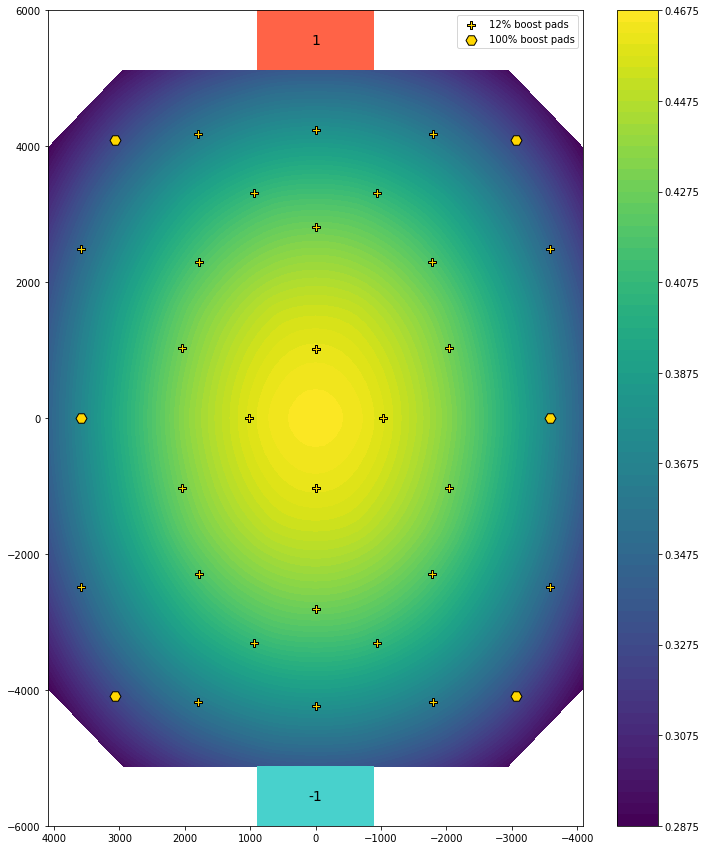

In [46]:
plotting.arena_contour(liu_dist_player2ball_zs)

#### Statistics

In [47]:
liu_dist_player2ball_vals = np.array([common_rewards.liu_dist_player2ball(grid_positions, ball_position)
                                      for ball_position in grid_positions]).mean(0)

Larger reward points are slightly more, along with medium reward points

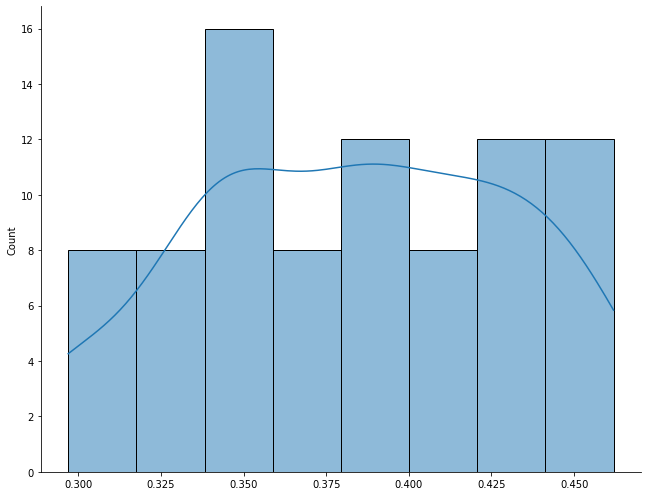

In [48]:
sns.displot(liu_dist_player2ball_vals, kde=True, height=7, aspect=1.3);

In [49]:
pd.Series(liu_dist_player2ball_vals).describe().round(3)

count    84.000
mean      0.383
std       0.048
min       0.297
25%       0.347
50%       0.388
75%       0.425
max       0.462
dtype: float64

### Save boost

In [50]:
save_boost_zs = common_rewards.save_boost(np.linspace(0, 1, 40))

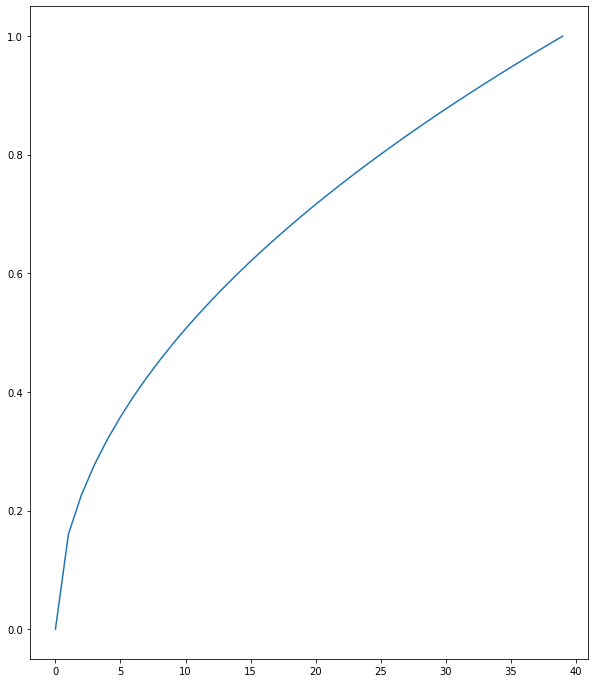

In [51]:
plt.figure(figsize=(10, 12))
plt.plot(save_boost_zs)
plt.show()

The difference between smaller boost values is rewarded more, moving the expected save boost reward above 0.5.

In [52]:
pd.Series(save_boost_zs).describe()

count    40.000000
mean      0.661694
std       0.252496
min       0.000000
25%       0.499873
50%       0.707049
75%       0.866002
max       1.000000
dtype: float64

### Touch ball

In [53]:
ball_positions_aerial = np.zeros((40, 2))
ball_positions_aerial = np.hstack((ball_positions_aerial,
                                   np.linspace(0, common_values.CEILING_Z, 40)[:, None]))

In [54]:
touch_ball_zs = np.array([common_rewards.touch_ball(ball_position_aerial, 1)
                          for ball_position_aerial in ball_positions_aerial])

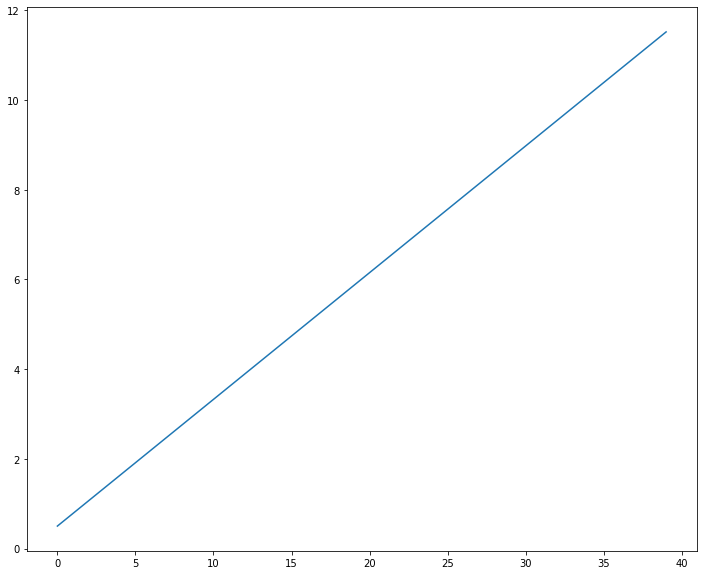

In [55]:
plt.figure(figsize=(12, 10))
plt.plot(touch_ball_zs);

For an exponent of 1, the expected aerial touch reward is ~6, with a maximum of 11.5.

In [56]:
pd.Series(touch_ball_zs).describe()

count    40.000000
mean      6.009434
std       3.302963
min       0.500000
25%       3.254717
50%       6.009434
75%       8.764151
max      11.518868
dtype: float64

In [57]:
touch_ball_zs = np.array([common_rewards.touch_ball(ball_position_aerial, 2)
                          for ball_position_aerial in ball_positions_aerial])

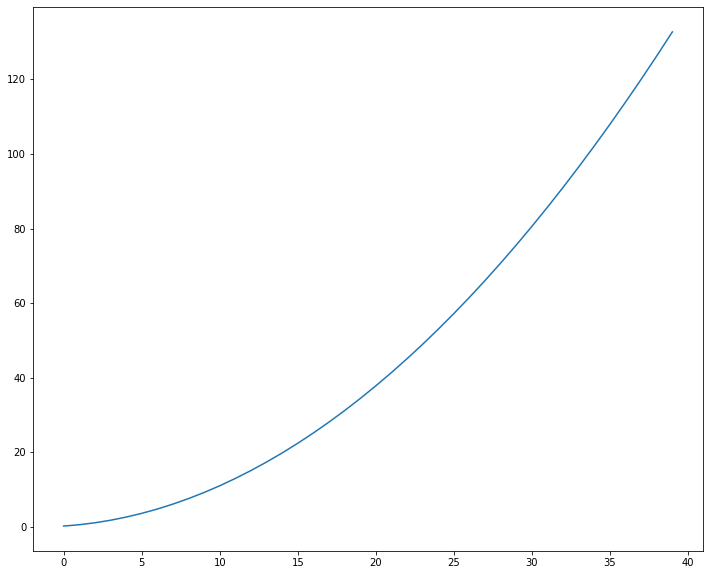

In [58]:
plt.figure(figsize=(12, 10))
plt.plot(touch_ball_zs);

For an exponent of 2, the aerial boost reward function changes to convex, from linear, with larger values and an expected reward of 46.

In [59]:
pd.Series(touch_ball_zs).describe()

count     40.000000
mean      46.750120
std       40.848273
min        0.250000
25%       10.608150
50%       36.133253
75%       76.825309
max      132.684318
dtype: float64

### Velocity

In [60]:
velocity_zs = common_rewards.velocity(player_velocities)

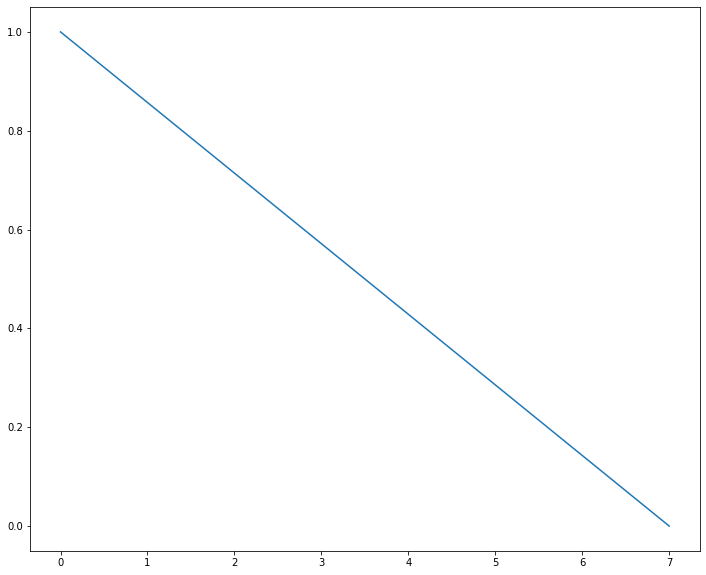

In [61]:
plt.figure(figsize=(12, 10))
plt.plot(velocity_zs);

The velocity reward is a linear reward with a mean of 0.5 and min and max of 0 and 1, respectively.

In [62]:
pd.Series(velocity_zs).describe()

count    8.000000
mean     0.499998
std      0.349926
min      0.000000
25%      0.249999
50%      0.499998
75%      0.749997
max      0.999996
dtype: float64

### Velocity ball to goal

#### Plot

In [63]:
velocity_ball2goal_zs = np.array([common_rewards.velocity_ball2goal(arena_positions,
                                                                    ball_lin_velocity * ball_lin_vec)
                                  for ball_lin_velocity in ball_velocities
                                  for ball_lin_vec in forward_vectors]).mean(0)

The expected ball to goal linear velocity is 0

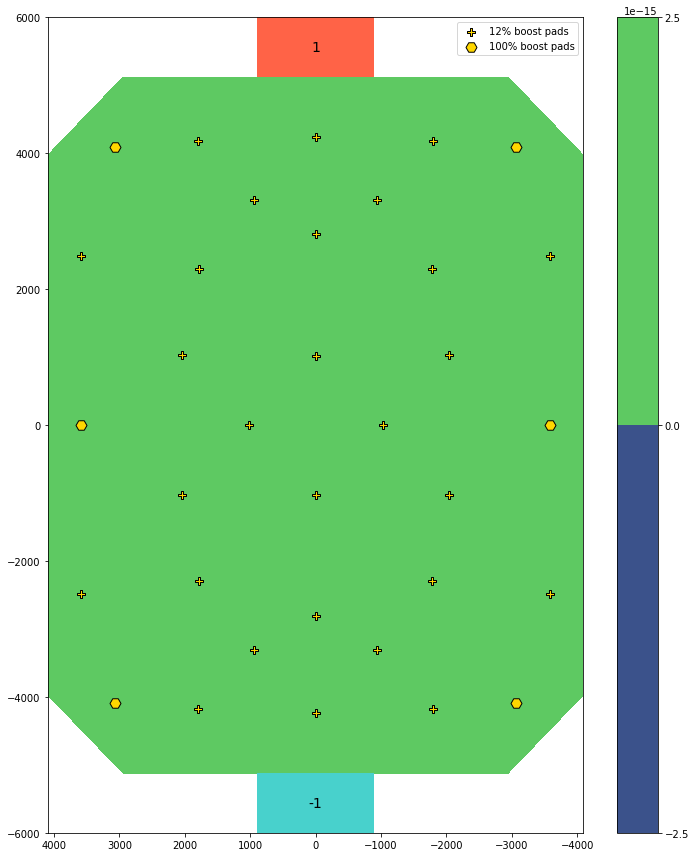

In [64]:
plotting.arena_contour(velocity_ball2goal_zs.round(3))

#### Statistics

For a ball that moves forward the expected reward is large

In [65]:
velocity_ball2goal_forward_zs = np.array([common_rewards.velocity_ball2goal(arena_positions,
                                                                            ball_lin_velocity * np.array([0, 1, 0]))
                                          for ball_lin_velocity in ball_velocities]).mean(0)

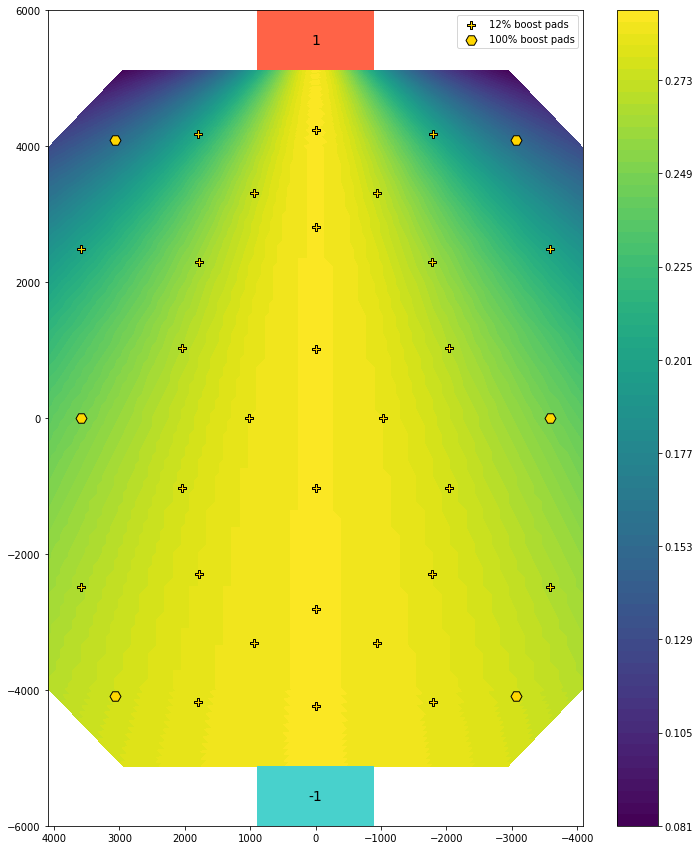

In [66]:
plotting.arena_contour(velocity_ball2goal_forward_zs.round(3))

In [67]:
velocity_ball2goal_forward_vals = np.array([common_rewards.velocity_ball2goal(grid_positions,
                                                                              ball_lin_velocity * np.array([0, 1, 0]))
                                            for ball_lin_velocity in ball_velocities]).mean(0)

The distribution has a peak on the high end

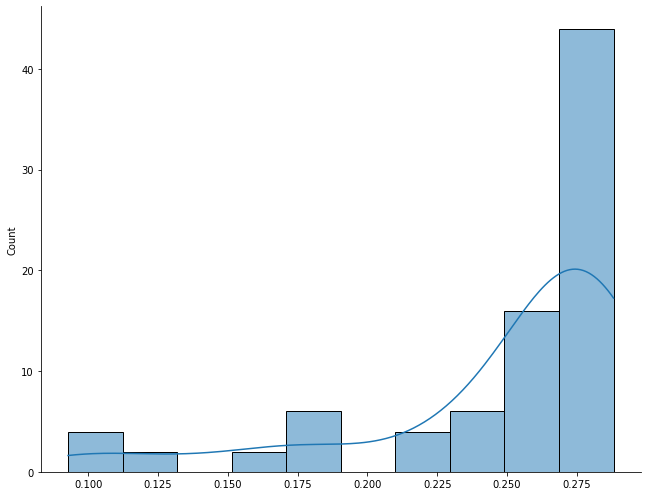

In [68]:
sns.displot(velocity_ball2goal_forward_vals, kde=True, height=7, aspect=1.3);

In [69]:
pd.Series(velocity_ball2goal_forward_vals).describe()

count    84.000000
mean      0.248032
std       0.051485
min       0.092808
25%       0.237977
50%       0.270071
75%       0.281596
max       0.288157
dtype: float64

For a ball moving backward, the rewards are negative

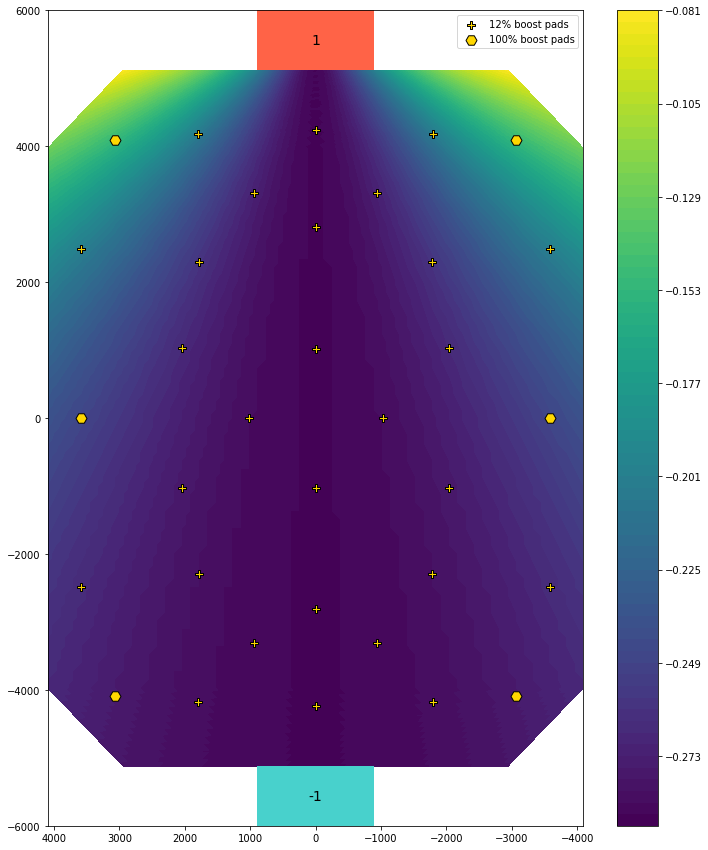

In [70]:
plotting.arena_contour(-velocity_ball2goal_forward_zs.round(3))

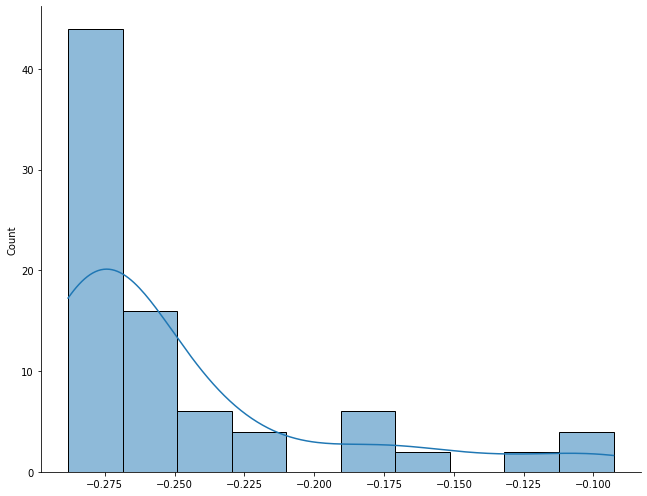

In [71]:
sns.displot(-velocity_ball2goal_forward_vals, kde=True, height=7, aspect=1.3);

In [72]:
pd.Series(-velocity_ball2goal_forward_vals).describe()

count    84.000000
mean     -0.248032
std       0.051485
min      -0.288157
25%      -0.281596
50%      -0.270071
75%      -0.237977
max      -0.092808
dtype: float64

For a ball moving left, the reward distribution has a peak of 0

In [73]:
velocity_ball2goal_left_zs = np.array([common_rewards.velocity_ball2goal(arena_positions,
                                                                         ball_lin_velocity * np.array([1, 0, 0]))
                                       for ball_lin_velocity in ball_velocities]).mean(0)

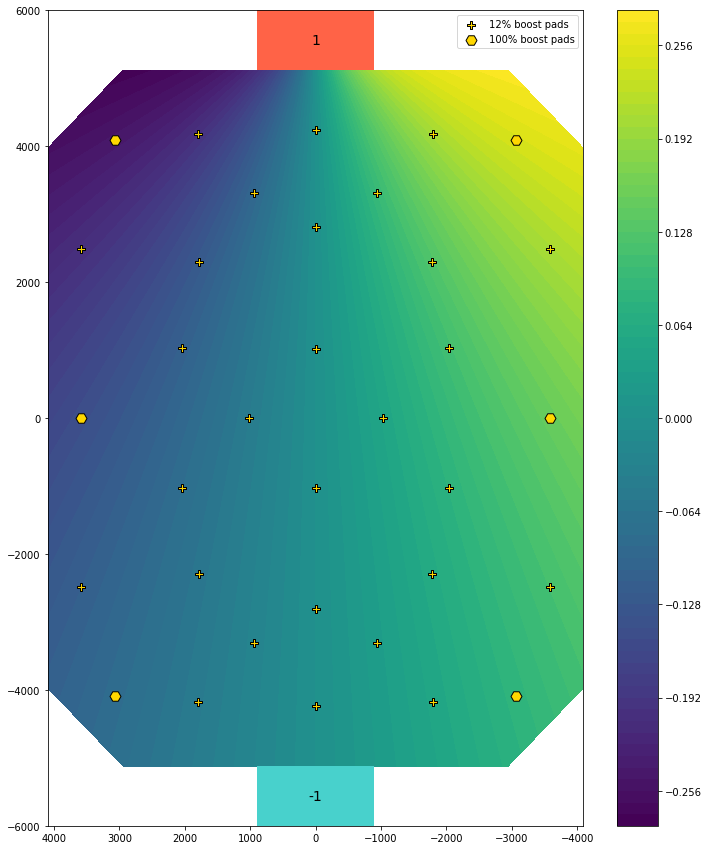

In [74]:
plotting.arena_contour(velocity_ball2goal_left_zs)

In [75]:
velocity_ball2goal_left_vals = np.array([common_rewards.velocity_ball2goal(grid_positions,
                                                                           ball_lin_velocity * np.array([1, 0, 0]))
                                         for ball_lin_velocity in ball_velocities]).mean(0)

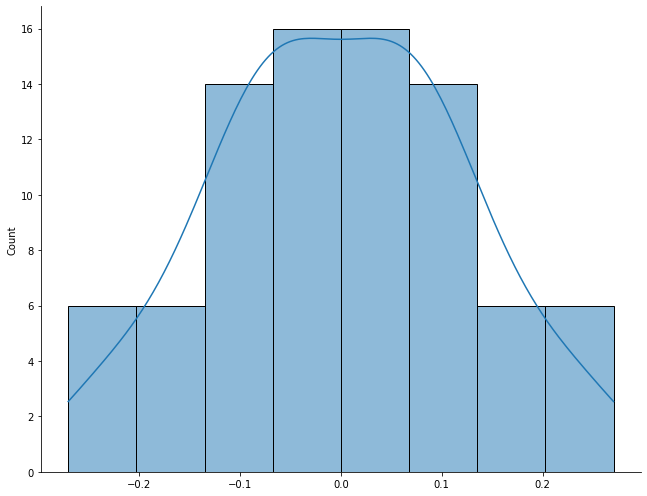

In [76]:
sns.displot(velocity_ball2goal_left_vals, kde=True, height=7, aspect=1.3);

In [77]:
pd.Series(velocity_ball2goal_left_vals).describe().round(3)

count    84.000
mean      0.000
std       0.123
min      -0.270
25%      -0.086
50%       0.000
75%       0.086
max       0.270
dtype: float64

Similarly for moving right

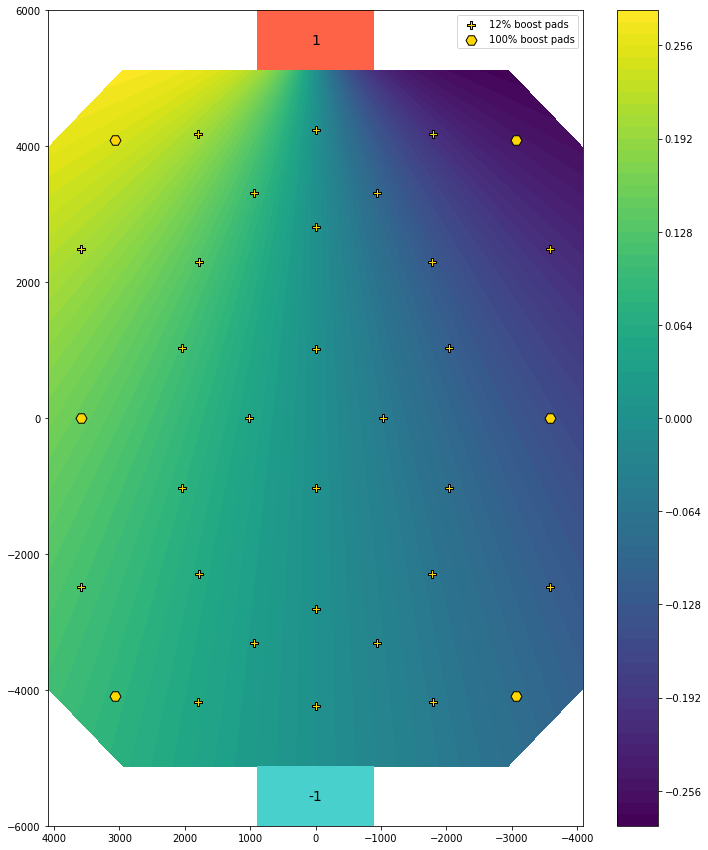

In [78]:
plotting.arena_contour(-velocity_ball2goal_left_zs)

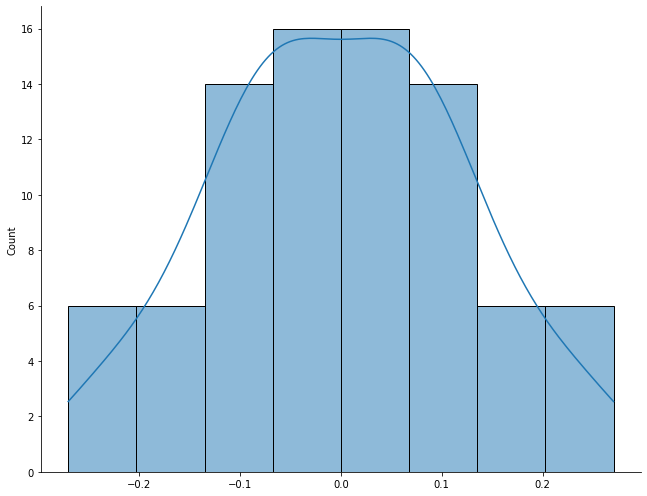

In [79]:
sns.displot(-velocity_ball2goal_left_vals, kde=True, height=7, aspect=1.3);

In [80]:
pd.Series(-velocity_ball2goal_left_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.123
min      -0.270
25%      -0.086
50%       0.000
75%       0.086
max       0.270
dtype: float64

### Velocity player to ball

#### Plot

This can take a while... A lot of point combinations are computed.

In [81]:
velocity_player2ball_zs = np.array([common_rewards.velocity_player2ball(arena_positions,
                                                                        player_lin_velocity * ball_lin_vec,
                                                                        ball_position)
                                    for player_lin_velocity in player_velocities
                                    for ball_lin_vec in forward_vectors
                                    for ball_position in grid_positions]).mean(0)

The expected player to ball velocity is 0

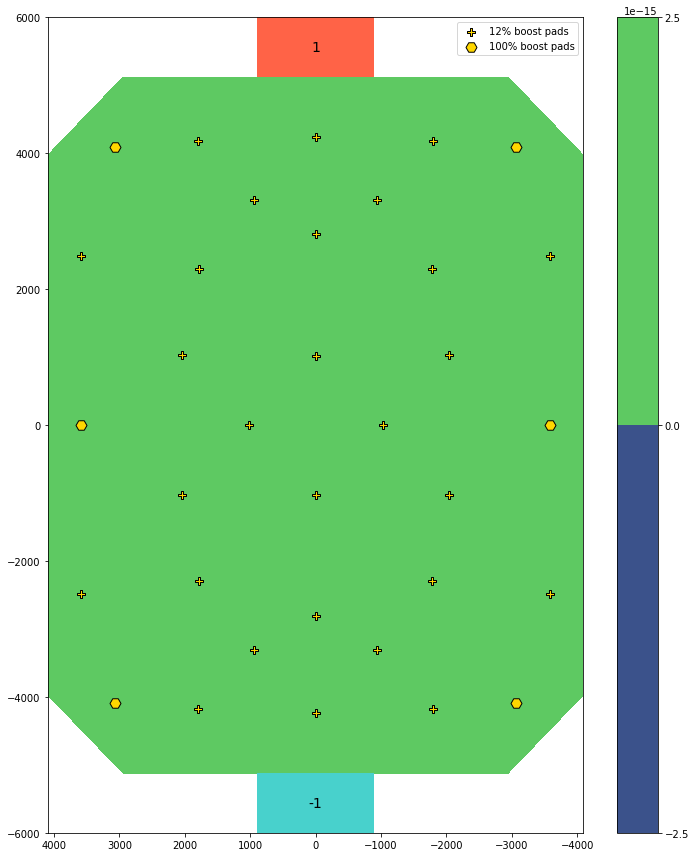

In [82]:
plotting.arena_contour(velocity_player2ball_zs.round(3))

#### Statistics

Moving forward

In [83]:
velocity_player2ball_forward_zs = np.array([common_rewards.velocity_player2ball(arena_positions,
                                                                                player_lin_velocity * np.array(
                                                                                    [0, 1, 0]),
                                                                                ball_position)
                                            for player_lin_velocity in player_velocities
                                            for ball_position in grid_positions]).mean(0)

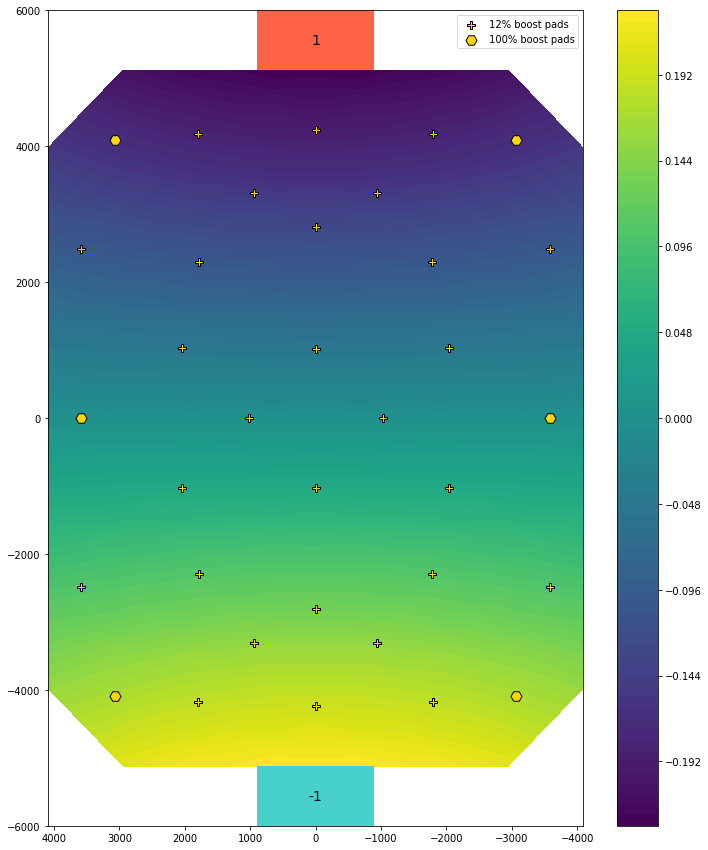

In [84]:
plotting.arena_contour(velocity_player2ball_forward_zs.round(3))

In [85]:
velocity_player2ball_forward_vals = np.array([common_rewards.velocity_player2ball(grid_positions,
                                                                                  player_lin_velocity * np.array(
                                                                                      [0, 1, 0]),
                                                                                  ball_position)
                                              for player_lin_velocity in player_velocities
                                              for ball_position in grid_positions]).mean(0)

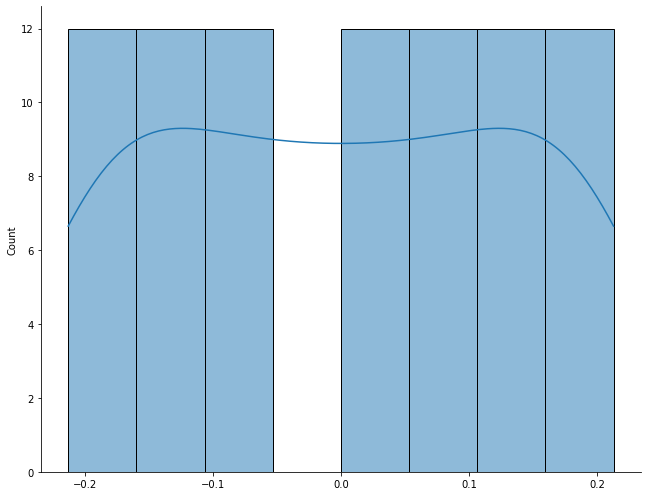

In [86]:
sns.displot(velocity_player2ball_forward_vals, kde=True, height=7, aspect=1.3);

In [87]:
pd.Series(velocity_player2ball_forward_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.139
min      -0.213
25%      -0.135
50%      -0.000
75%       0.135
max       0.213
dtype: float64

Moving left

In [88]:
velocity_player2ball_left_zs = np.array([common_rewards.velocity_player2ball(arena_positions,
                                                                             player_lin_velocity * np.array([1, 0, 0]),
                                                                             ball_position)
                                         for player_lin_velocity in player_velocities
                                         for ball_position in grid_positions]).mean(0)

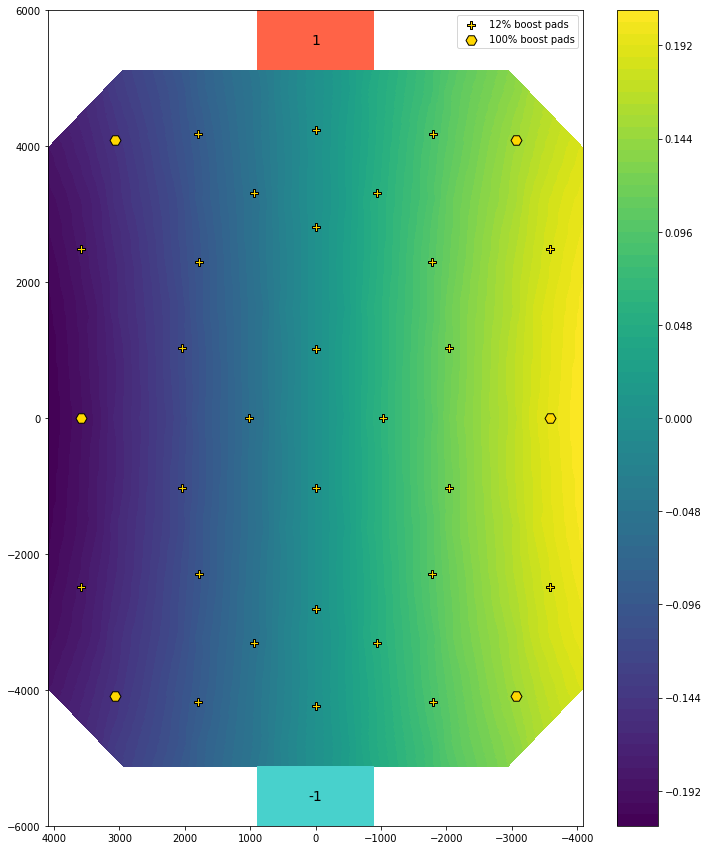

In [89]:
plotting.arena_contour(velocity_player2ball_left_zs.round(3))

In [90]:
velocity_player2ball_left_vals = np.array([common_rewards.velocity_player2ball(grid_positions,
                                                                               player_lin_velocity * np.array(
                                                                                   [0, 1, 0]),
                                                                               ball_position)
                                           for player_lin_velocity in player_velocities
                                           for ball_position in grid_positions]).mean(0)

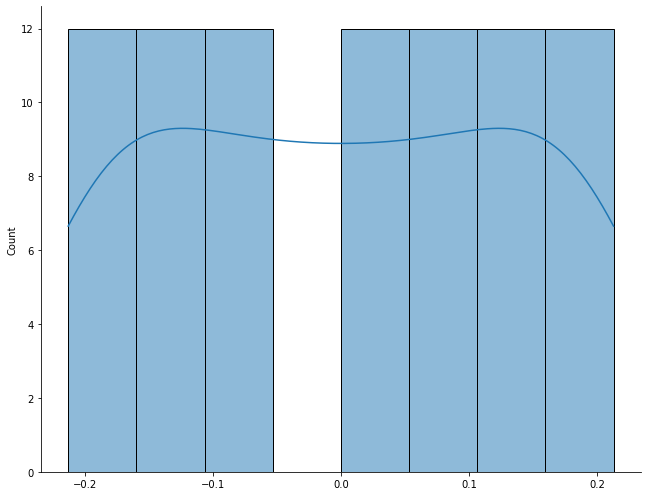

In [91]:
sns.displot(velocity_player2ball_left_vals, kde=True, height=7, aspect=1.3);

In [92]:
pd.Series(velocity_player2ball_left_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.139
min      -0.213
25%      -0.135
50%      -0.000
75%       0.135
max       0.213
dtype: float64

We skip extra rewards

## Custom

### Distance ball to goal wall

#### Plot

In [93]:
cust_ball_y_coord_zs = custom_rewards.ball_y_coord(arena_positions)

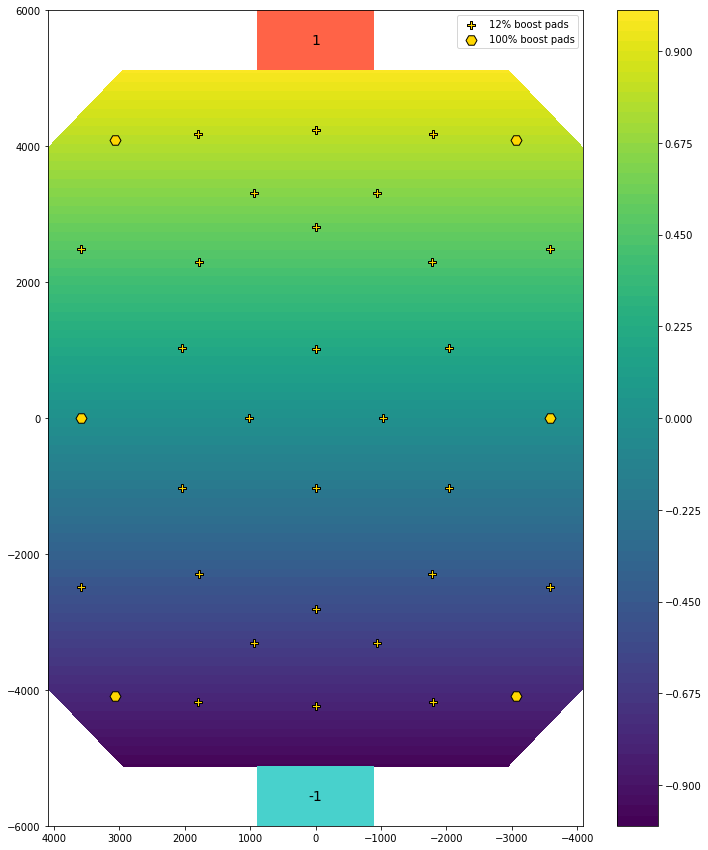

In [94]:
plotting.arena_contour(cust_ball_y_coord_zs)

When the exponent is large the rewards get steeper

In [95]:
cust_ball_y_coord_zs = custom_rewards.ball_y_coord(arena_positions, exponent=2)

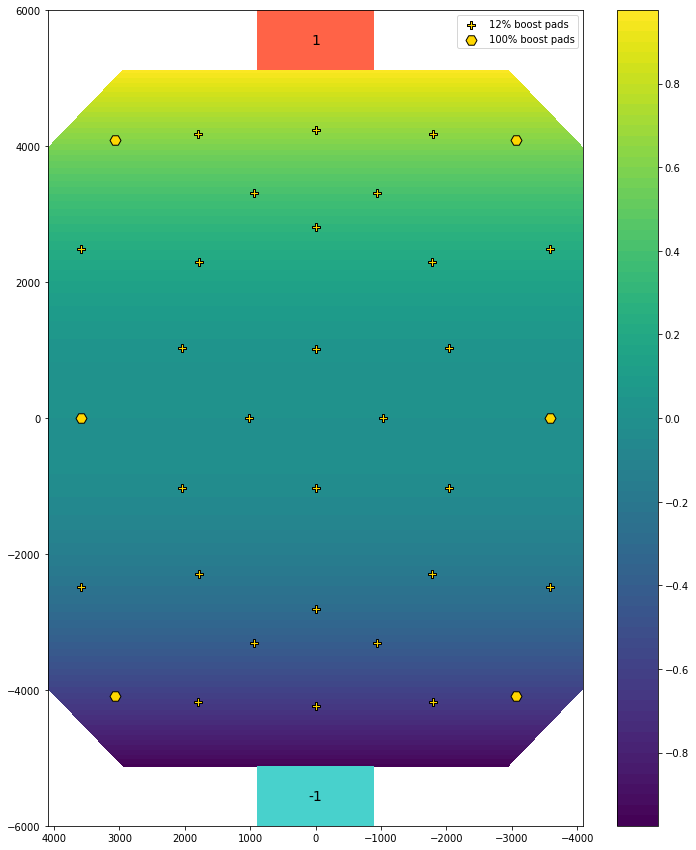

In [96]:
plotting.arena_contour(cust_ball_y_coord_zs)

### Distance player to ball

In [97]:
cust_liu_dist_player2ball_zs = np.array([custom_rewards.liu_dist_player2ball(arena_positions,
                                                                             ball_position,
                                                                             dispersion=1,
                                                                             density=1)
                                         for ball_position in grid_positions]).mean(0)

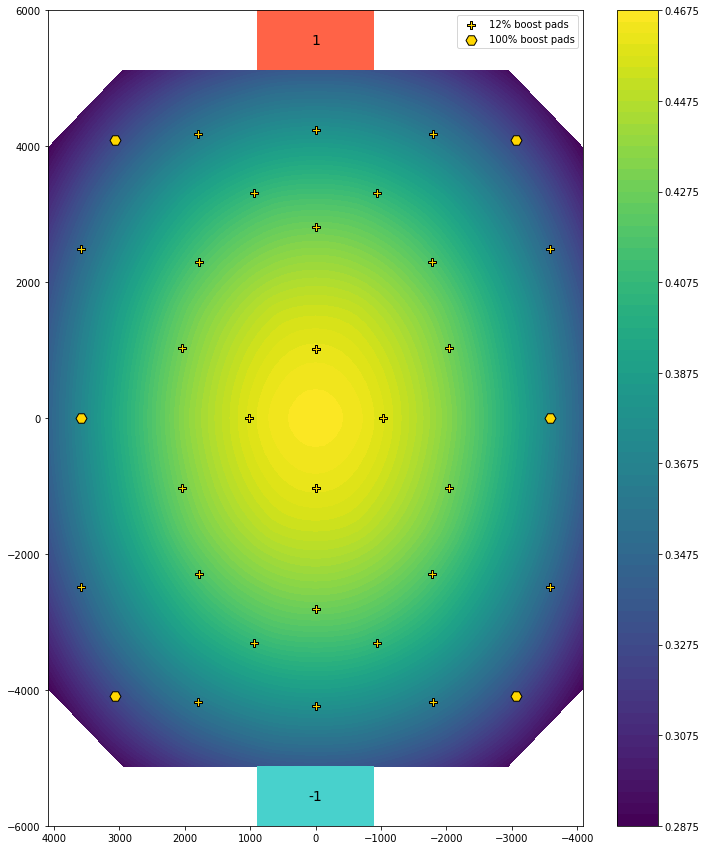

In [98]:
plotting.arena_contour(cust_liu_dist_player2ball_zs)

A large dispersion value makes player distance to ball distribution values greater

In [99]:
cust_liu_dist_player2ball_zs = np.array([custom_rewards.liu_dist_player2ball(arena_positions,
                                                                             ball_position,
                                                                             dispersion=1.2,
                                                                             density=1)
                                         for ball_position in grid_positions]).mean(0)

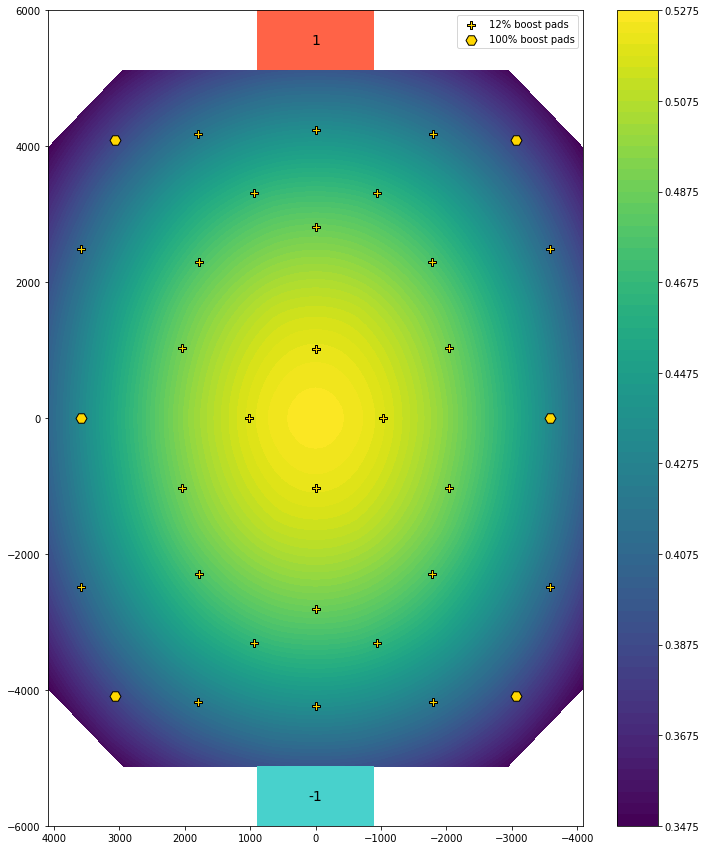

In [100]:
plotting.arena_contour(cust_liu_dist_player2ball_zs)

In [101]:
cust_liu_dist_player2ball_zs = np.array([custom_rewards.liu_dist_player2ball(arena_positions,
                                                                             ball_position,
                                                                             dispersion=0.9,
                                                                             density=1.4)
                                         for ball_position in grid_positions]).mean(0)

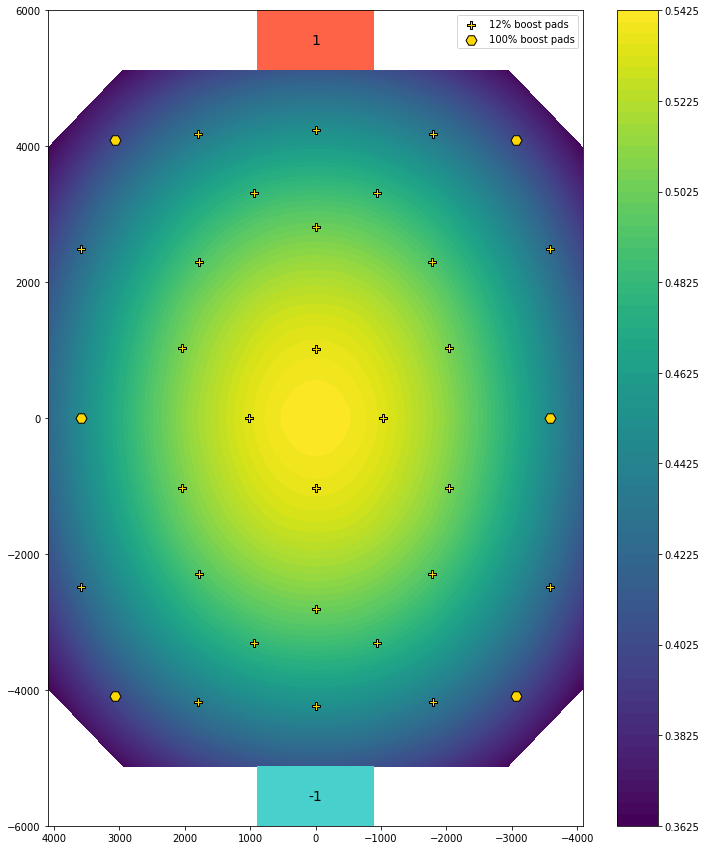

In [102]:
plotting.arena_contour(cust_liu_dist_player2ball_zs)

### Ball to goal distance

In [103]:
cust_liu_dist_ball2goal_zs = custom_rewards.signed_liu_dist_ball2goal(arena_positions, dispersion=1, density=1)

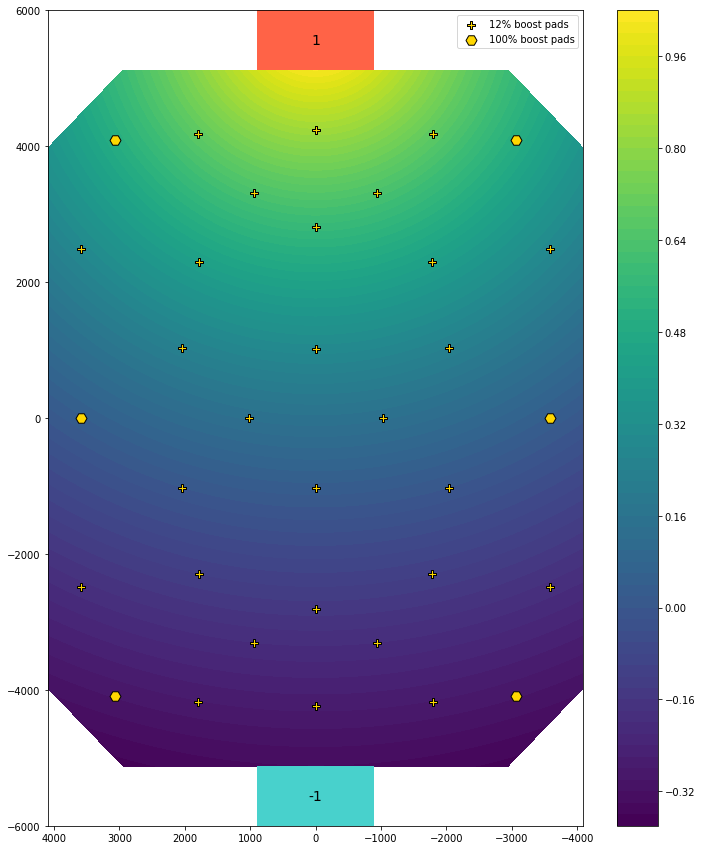

In [104]:
plotting.arena_contour(cust_liu_dist_ball2goal_zs)

A larger dispersion moves the 0 point further

In [105]:
cust_liu_dist_ball2goal_zs = custom_rewards.signed_liu_dist_ball2goal(arena_positions, dispersion=1.2, density=1)

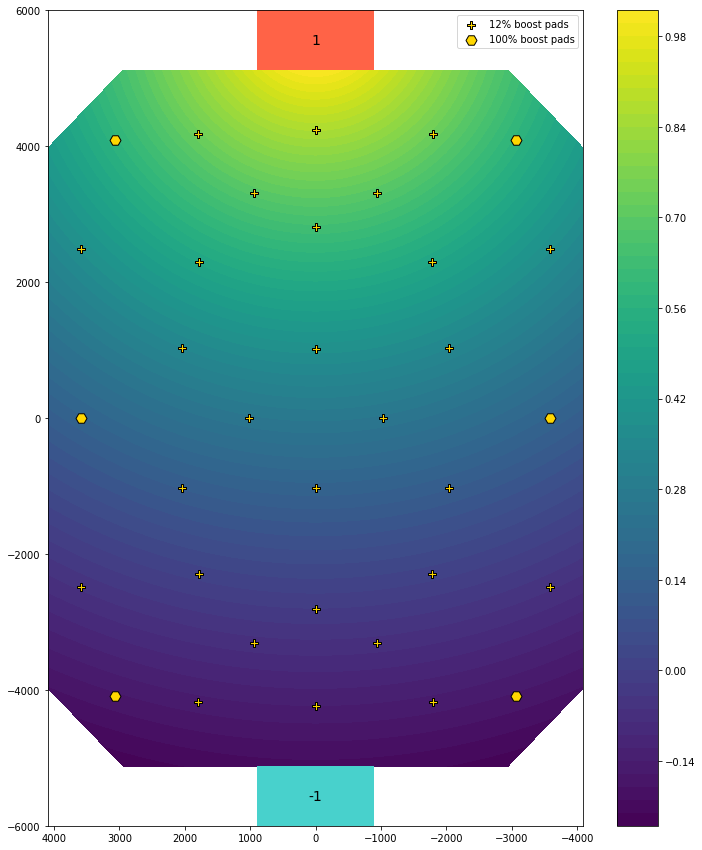

In [106]:
plotting.arena_contour(cust_liu_dist_ball2goal_zs)

A larger density makes the distribution curved, like a sigma

In [107]:
cust_liu_dist_ball2goal_zs = custom_rewards.signed_liu_dist_ball2goal(arena_positions, dispersion=0.9, density=1.3)

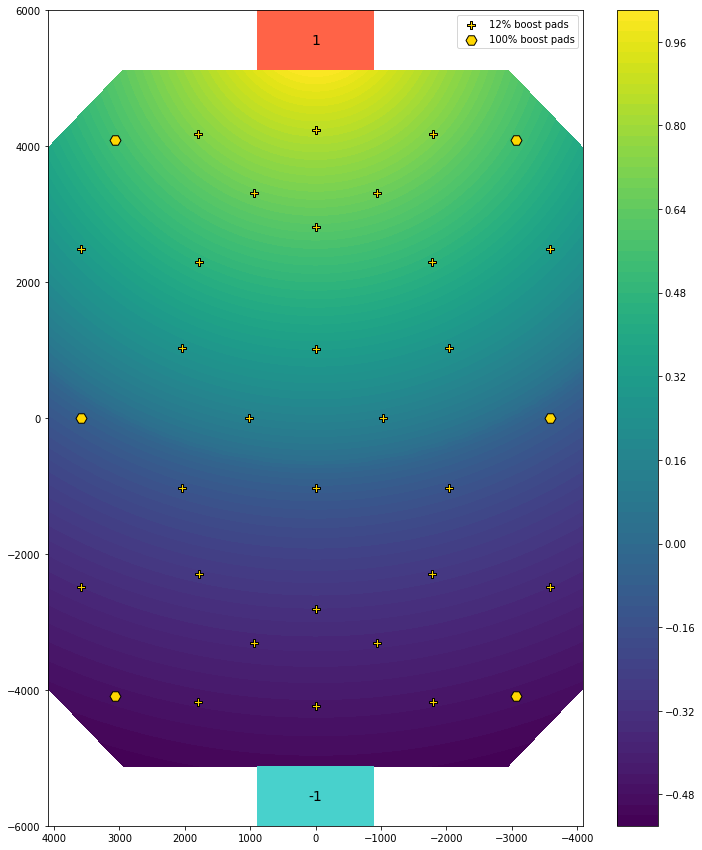

In [108]:
plotting.arena_contour(cust_liu_dist_ball2goal_zs)

## Additional

### Ball to goal distance orange to blue difference

Inspired by the Necto reward

#### Plot

In [109]:
liu_dist_ball2goal_difference_zs = (common_rewards.liu_dist_ball2goal(arena_positions) -
                                    common_rewards.liu_dist_ball2goal(arena_positions, True))

The difference of ball to goal distance between the two goals creates a distribution with a value of 0 near the mid line

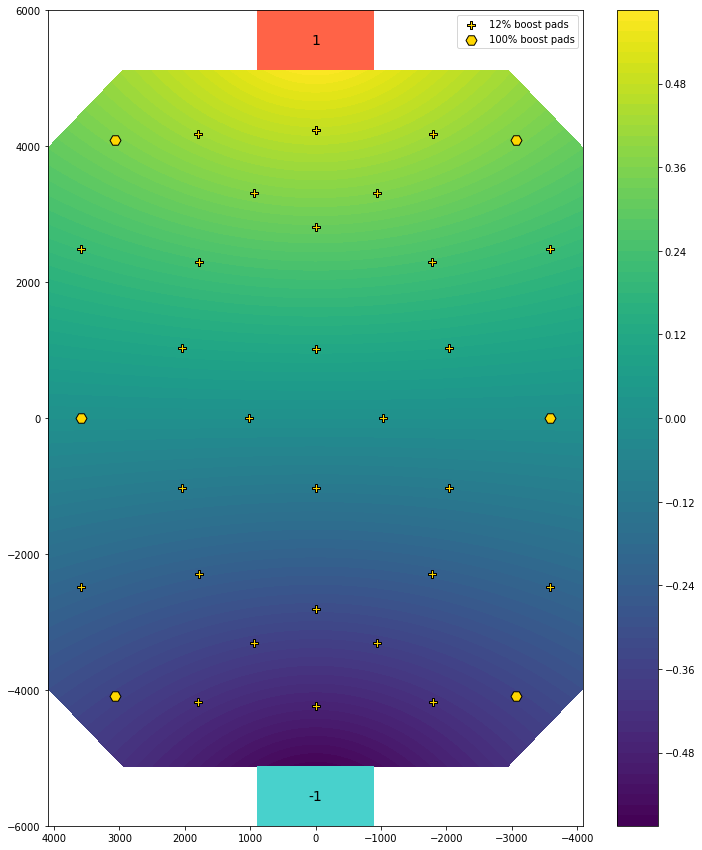

In [110]:
plotting.arena_contour(liu_dist_ball2goal_difference_zs)

#### Statistics

In [111]:
liu_dist_ball2goal_difference_vals = (common_rewards.liu_dist_ball2goal(grid_positions) -
                                      common_rewards.liu_dist_ball2goal(grid_positions, True))

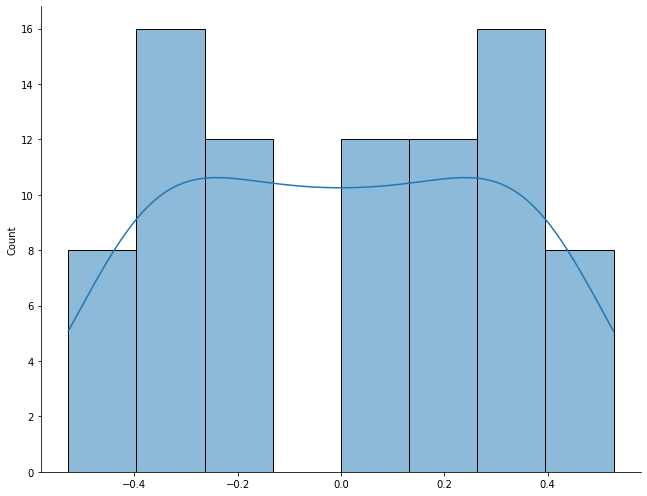

In [112]:
sns.displot(liu_dist_ball2goal_difference_vals, kde=True, height=7, aspect=1.3);

In [113]:
pd.Series(liu_dist_ball2goal_difference_vals).describe().round(3)

count    84.000
mean     -0.000
std       0.305
min      -0.528
25%      -0.279
50%       0.000
75%       0.279
max       0.528
dtype: float64

Additional reward thoughts and ideas:
- What is a good potential function?

Inspired by Necto:
- Touch ball with acceleration, toward goal preferably?
- Reward ball goal speed? Is it possible with ball to goal velocity?
- Opponent punish weight in distributed team spirit reward?
- How much does dribbling reward? We assume a semi-continuous touch ball reward at ball height axis z=150.